# Classification Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Creaye data
from sklearn.datasets import make_circles

# 1000 circles
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

## Function to visualise predictions of the model

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    # create x values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    # make predictions
    y_pred = model.predict(x_in)
    # check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multi-class classification")
        # so, we re-shaping our pred for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Non-linear models

## Model 1

In [4]:
# Create a model
model_nl1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_nl1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history1 = model_nl1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.0229 - accuracy: 0.4770
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.8663 - accuracy: 0.4770
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.8042 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.7437 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6065 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5594 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5201 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5127 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5082 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5050 - accuracy: 0.4710
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing binary classification


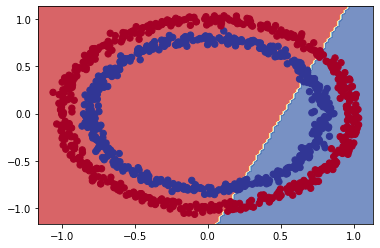

In [5]:
plot_decision_boundary(model_nl1, X, y)

## Model 2

In [6]:
# Create a model
model_nl2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_nl2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
model_nl2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 3ms/step
Doing binary classification


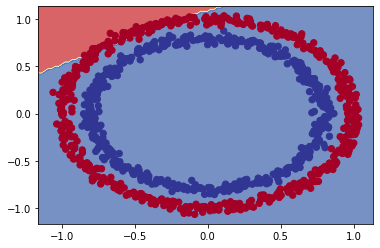

In [7]:
plot_decision_boundary(model_nl2, X, y)

## Model 3

In [8]:
# Create a model
model_nl3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history3 = model_nl3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6911 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.5060
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5090
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5090
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5120
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5110
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5140
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5130
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5160
Epoch 11/

313/313 [==============================] - 1s 3ms/step
Doing binary classification


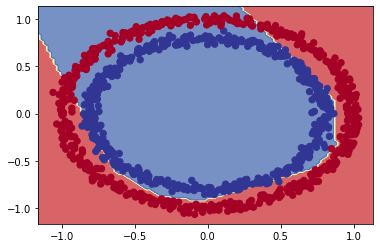

In [9]:
plot_decision_boundary(model_nl3, X, y)

## Model evaluation

In [10]:
# Mock tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

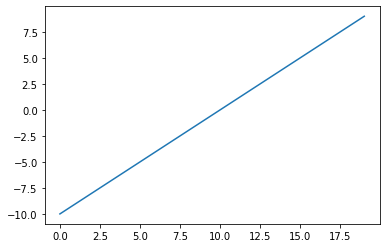

In [11]:
plt.plot(A)

In [12]:
# Replicating sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

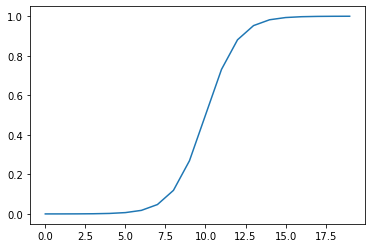

In [13]:
# Apply sigmoid to mock tensor and plot it
plt.plot(sigmoid(A))

In [14]:
# Replicating relu function
def relu(x):
    return tf.maximum(0, x)

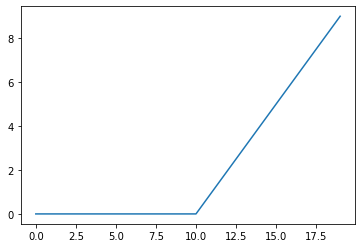

In [15]:
# Aply relu function to mock tensor and plot it
plt.plot(relu(A))

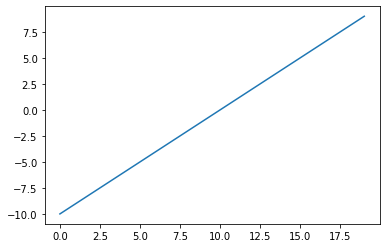

In [16]:
# Checking linear function
plt.plot(tf.keras.activations.linear(A))

In [17]:
# Does linear activation changes anything in tendor? No!
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Splitting dataset into training and testing parts

In [18]:
len(X)

1000

In [19]:
# 80/20 split
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [20]:
# Create a model
model_nl4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# Fit the model
history4 = model_nl4.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6974 - accuracy: 0.4688
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5412
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.6425
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.6488
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.6263
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.7125
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6089 - accuracy: 0.6950
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.7788
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.7462
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5387 - accuracy: 0.7625
Epoch 11/25
25/25 [

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 4ms/step
Doing binary classification


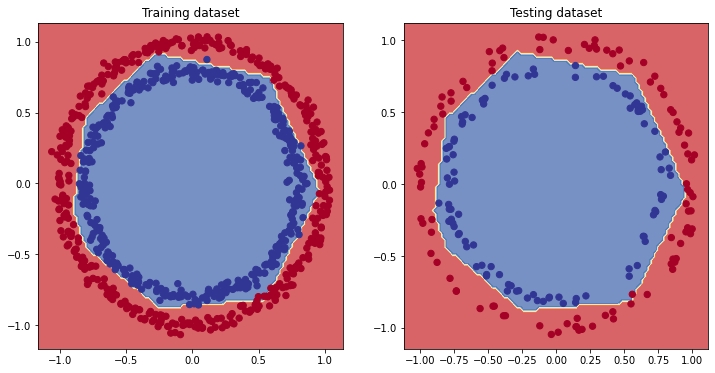

In [21]:
# Plot the decision boundaries for training and testing datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training dataset")
plot_decision_boundary(model=model_nl4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Testing dataset")
plot_decision_boundary(model_nl4, X_test, y_test)

## Plotting the loss curve

In [22]:
history4.history

{'loss': [0.6974413990974426,
  0.6845349669456482,
  0.6745164394378662,
  0.6644561290740967,
  0.6502086520195007,
  0.634141206741333,
  0.6088672876358032,
  0.5860118865966797,
  0.5560539364814758,
  0.5387061834335327,
  0.5033212900161743,
  0.4684002995491028,
  0.4089706838130951,
  0.36242589354515076,
  0.30516770482063293,
  0.25855714082717896,
  0.22443176805973053,
  0.19436264038085938,
  0.16976962983608246,
  0.15514802932739258,
  0.13918191194534302,
  0.11900635808706284,
  0.10936137288808823,
  0.1034512147307396,
  0.09955709427595139],
 'accuracy': [0.46875,
  0.5412499904632568,
  0.6424999833106995,
  0.6487500071525574,
  0.6262500286102295,
  0.7124999761581421,
  0.6949999928474426,
  0.7787500023841858,
  0.7462499737739563,
  0.762499988079071,
  0.7875000238418579,
  0.7925000190734863,
  0.862500011920929,
  0.9075000286102295,
  0.9524999856948853,
  0.9762499928474426,
  0.9775000214576721,
  0.9837499856948853,
  0.9850000143051147,
  0.9800000190

In [23]:
import pandas as pd

loss_pd4 = pd.DataFrame(history4.history)
loss_pd4

,loss,accuracy
0,0.697441,0.46875
1,0.684535,0.54125
2,0.674516,0.64250
3,0.664456,0.64875
4,0.650209,0.62625
5,0.634141,0.71250
6,0.608867,0.69500
7,0.586012,0.77875
8,0.556054,0.74625
9,0.538706,0.76250


Text(0.5, 1.0, 'Loss curve')

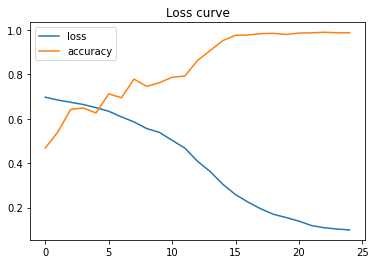

In [24]:
loss_pd4.plot()
plt.title("Loss curve")

## Finding the best learning rate

In [25]:
# Create a model
model_nl5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Introduce a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

# Fit the model, along with the learning rate scheduler
history5 = model_nl5.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6948 - accuracy: 0.4875 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.4875 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.4875 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4900 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4900 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4875 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

In [26]:
loss_pd5 = pd.DataFrame(history5.history)
loss_pd5

,loss,accuracy,lr
0,0.694808,0.48750,0.000100
1,0.694733,0.48750,0.000112
2,0.694662,0.48750,0.000126
3,0.694598,0.49000,0.000141
4,0.694479,0.48875,0.000158
...,...,...,...
95,0.755583,0.55125,5.623413
96,0.789538,0.50125,6.309574
97,0.892173,0.48125,7.079458
98,0.816743,0.45875,7.943282


<AxesSubplot:xlabel='epochs'>

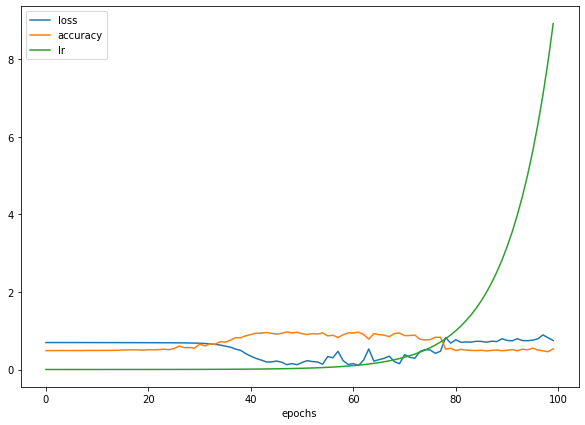

In [27]:
loss_pd5.plot(figsize=(10, 7), xlabel="epochs")

In [28]:
# Learning rate values
lrs = 1e-4 * (10 ** (tf.range(100) / 20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate vs Loss')

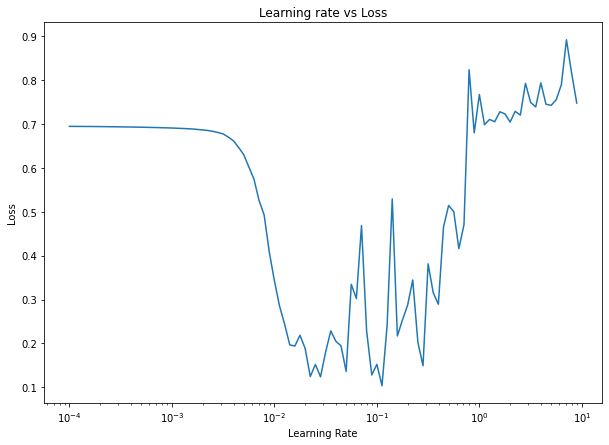

In [29]:
# Plot the learning rate vs loss
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history5.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

## Finding the model accuracy

In [32]:
loss, accuracy = model_nl4.evaluate(X_test, y_test)
print(f"Model's loss: {loss}")
print(f"Model's accuracy: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9950
Model's loss: 0.08147099614143372
Model's accuracy: 99.50%


## Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_nl4.predict(X_test)
y_preds[:10]


7/7 [==============================] - 0s 1ms/step


array([[8.6340863e-01],
       [9.8227537e-01],
       [9.6592093e-01],
       [9.9120826e-01],
       [1.6200468e-01],
       [9.6004328e-04],
       [8.9446813e-01],
       [6.3489303e-02],
       [8.8522685e-01],
       [1.6314389e-02]], dtype=float32)

In [51]:
y_preds_round = tf.round(y_preds)
y_preds_round[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [52]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [53]:
# Create confusioon matrix
confusion_matrix(y_test, y_preds_round)

array([[100,   1],
       [  0,  99]], dtype=int64)